In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('adult.data', sep=',', names=["age","workclass","fnlwgt","education","education-num","marital-status",
                                              "occupation","relationship","race","sex","capital-gain","capital-loss",
                                               "hours-per-week","native-country", "income"])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Cleaning

In [3]:
df.shape

(32561, 15)

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [5]:
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
c = ['?']
df.isin(c).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [9]:
#looks like all the unkown occupation people also have unkown workclass, this can be dropped

In [10]:
print('workclass')
print(df.loc[df['workclass']=='?'].index)
print('occupation')
print(df.loc[df['occupation']=='?'].index)

workclass
Int64Index([   27,    61,    69,    77,   106,   128,   149,   154,   160,
              187,
            ...
            32426, 32477, 32490, 32494, 32525, 32530, 32531, 32539, 32541,
            32542],
           dtype='int64', length=1836)
occupation
Int64Index([   27,    61,    69,    77,   106,   128,   149,   154,   160,
              187,
            ...
            32426, 32477, 32490, 32494, 32525, 32530, 32531, 32539, 32541,
            32542],
           dtype='int64', length=1843)


In [11]:
drop_row = ['workclass', 'occupation', 'native-country']
for i in drop_row:
    df.drop(df.loc[df[i]=='?'].index, inplace=True)

In [12]:
df.shape

(30162, 15)

In [13]:
c = ['?']
df.isin(c).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

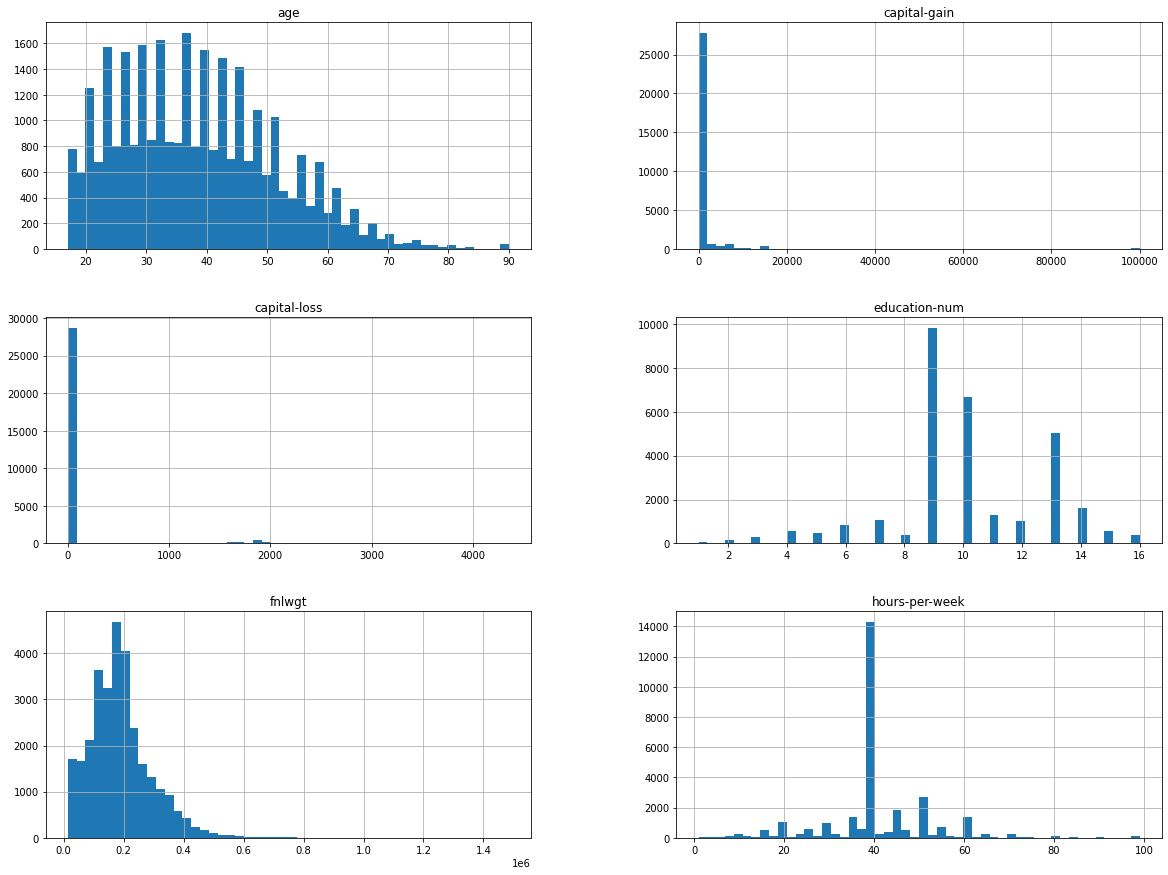

In [14]:
df.hist(bins=50, figsize=(20,15))

In [15]:
int_col = []
obj_col = []
for i in df.columns:
    if(str(df[i].dtypes) == 'int64'):
        int_col.append(i)
    elif(i != 'income' and i!='education'):
        obj_col.append(i)
print(int_col)
print(obj_col)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


### Processing data for Machine Learning

In [16]:
df_processed = df.copy()
df_processed.drop(columns=['education'],inplace=True)

In [17]:
df_processed.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
df_processed = pd.get_dummies(df_processed, columns=obj_col, drop_first=False)
df_processed = pd.get_dummies(df_processed, columns=['income'], drop_first=True)

In [19]:
df_processed

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

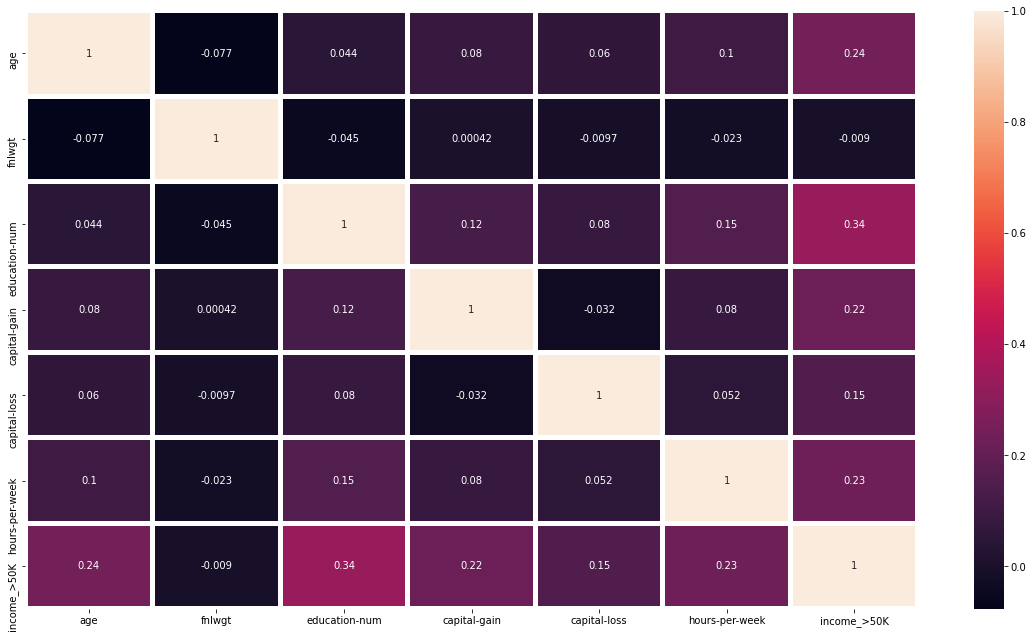

In [20]:
int_col.append('income_>50K')
plt.figure(figsize = (20,11))
sns.heatmap(df_processed.loc[:,int_col].astype(float).corr(), annot=True, lw=4)

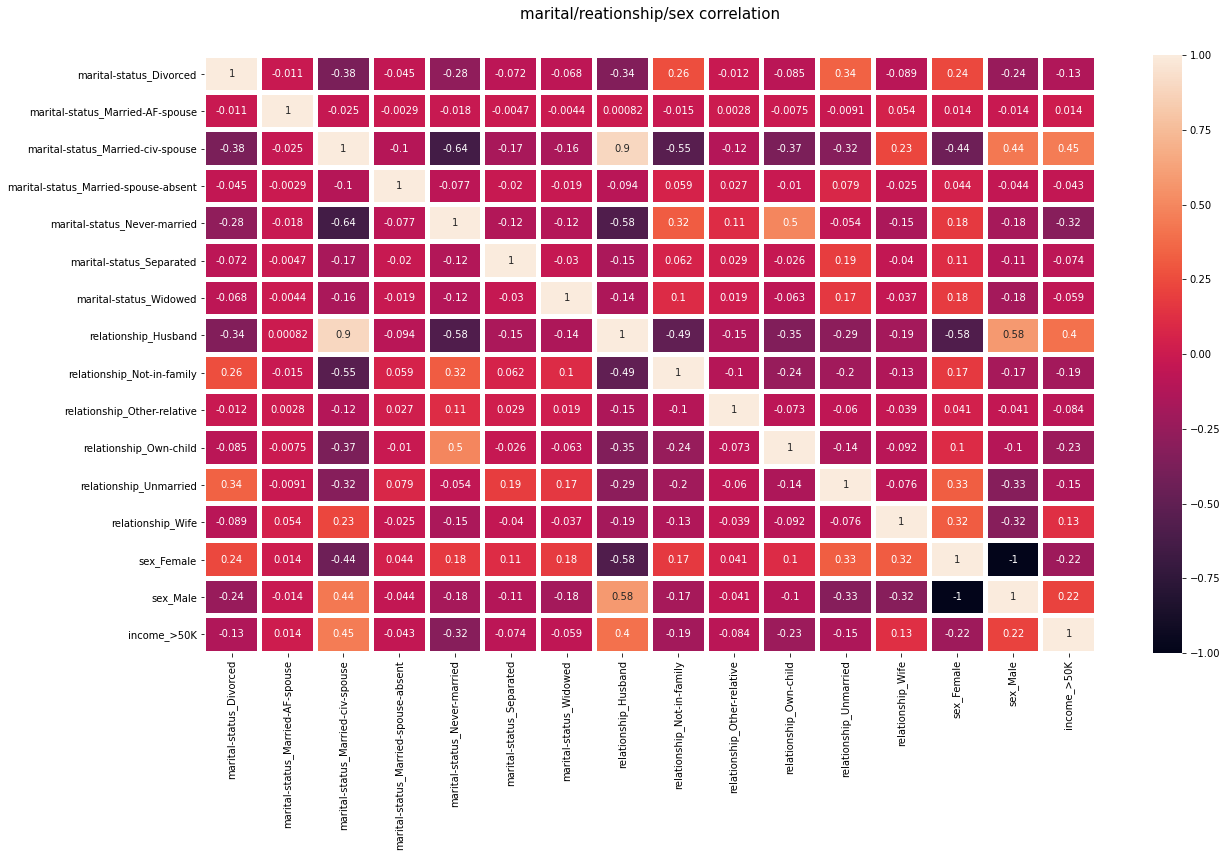

In [21]:
plt.figure(figsize = (20,11))
sns.heatmap(df_processed.loc[:, df_processed.columns.str.contains('marital-status') | 
                             df_processed.columns.str.contains('relationship') |
                            df_processed.columns.str.contains('sex') | df_processed.columns.str.contains('income')].corr(), annot=True, lw=4)
plt.title('marital/reationship/sex correlation', y=1.05, size =15)
plt.show()

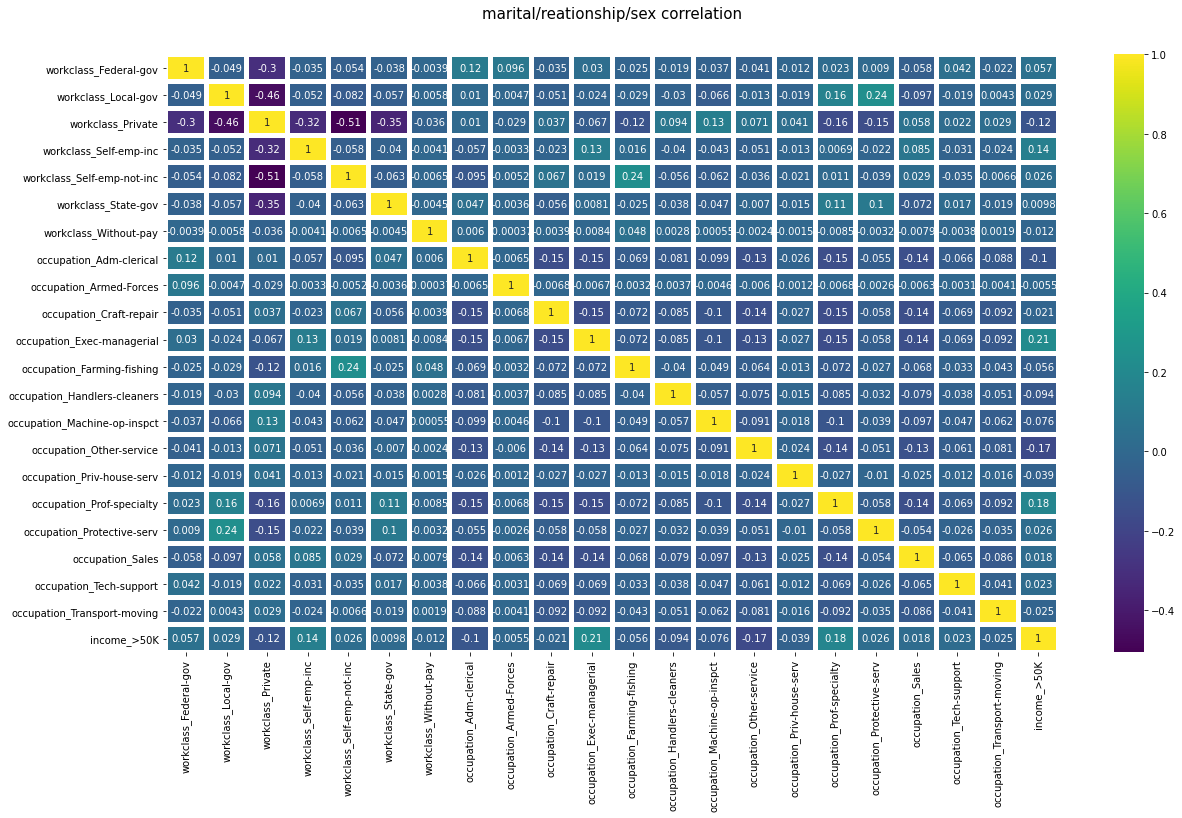

In [22]:
plt.figure(figsize = (20,11))
sns.heatmap(df_processed.loc[:, df_processed.columns.str.contains('workclass') | 
                             df_processed.columns.str.contains('occupation') | df_processed.columns.str.contains('income')].corr(), 
            annot=True, lw=4, cmap = plt.cm.viridis)
plt.title('marital/reationship/sex correlation', y=1.05, size =15)
plt.show()

In [24]:
#looks like there are some co-correlated features so let's do some feature selection to find the best one

### Feature selection 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [27]:
features_name = [i for i in df_processed.columns if (i != 'income_>50K')]
x = df_processed[features_name]
y = df_processed['income_>50K']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape

((24129, 88), (6033, 88))

### Feature selection by using feature importance from random forest classifier

In [30]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(x_train, y_train)
sel.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [31]:
#used features that were only selected by the feature importance feature selection
features = x_train.columns[sel.get_support()]
#average mean that has to be bigger for feature to be selected
print(np.mean(sel.estimator_.feature_importances_))
sel.estimator_.feature_importances_


0.011363636363636364


array([1.56394527e-01, 1.63715835e-01, 1.14934581e-01, 9.79479642e-02,
       3.39245633e-02, 8.35398663e-02, 5.35031779e-03, 5.38657669e-03,
       9.50970813e-03, 6.35091847e-03, 7.90981954e-03, 4.39469575e-03,
       8.80650762e-05, 6.53855281e-03, 3.24253612e-04, 5.74190211e-02,
       9.34149630e-04, 1.99213414e-02, 1.74893314e-03, 1.41456776e-03,
       5.16095309e-03, 2.12684138e-05, 6.98496473e-03, 1.67747233e-02,
       5.36236849e-03, 3.52744819e-03, 4.07531558e-03, 9.39031122e-03,
       1.63674670e-04, 1.53045279e-02, 2.74533255e-03, 6.26586783e-03,
       4.63414421e-03, 4.57198164e-03, 4.21837883e-02, 1.18470129e-02,
       1.65391193e-03, 1.00039762e-02, 5.71029876e-03, 1.08108106e-02,
       1.54200033e-03, 2.63556668e-03, 4.49702166e-03, 7.32762853e-04,
       5.69708032e-03, 9.84553936e-03, 8.98155110e-03, 3.51734311e-04,
       1.02176096e-03, 3.83124431e-04, 2.26345344e-04, 8.05176275e-04,
       1.47583352e-04, 5.74195640e-05, 2.24604521e-04, 1.00909483e-03,
      

In [36]:
#features that will be used to train the random forest classifiers
features

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'occupation_Exec-managerial',
       'occupation_Prof-specialty', 'relationship_Husband',
       'relationship_Not-in-family'],
      dtype='object')

In [32]:
x_train_rcf = sel.transform(x_train)
x_test_rcf = sel.transform(x_test)

In [33]:
def random_forest(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy : ", accuracy_score(y_test,y_pred))

In [34]:
print('Feature Importance from Random Forrest Classifier')
random_forest(x_train_rcf, x_test_rcf, y_train, y_test)

Feature Importance from Random Forrest Classifier
Accuracy :  0.8422012265871043
